In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [185]:
warnings.filterwarnings('ignore')

In [186]:
dftr=pd.read_csv('titanic_train.csv')

In [187]:
dftr.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [188]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [189]:
dftr.shape

(891, 11)

In [190]:
dftr.isna().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

В столбцах age, cabin,embarked присутствуют NAN - значения

NaN означает не-число.

**Заменим все NAN значения в нашем датафрейме**

In [191]:
dftr['age'].fillna(dftr['age'].median(), inplace = True)

In [192]:
dftr['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [193]:
dftr['embarked'].fillna('S',inplace=True)

In [194]:
dic={'S': 1, 'C':2, 'Q' :3}

In [195]:
dftr['embarked']=dftr['embarked'].map(dic)

Выбросим ненужные значения

In [196]:
dftr.drop(columns=['cabin', 'ticket'], inplace=True )

Заменим в колонке пол жензин и мужчин на бинарные числа 0 и 1

In [197]:
dics={'female' : 1, 'male': 0}

In [198]:
dftr['sex']=dftr['sex'].map(dics)

**Выкинем имена**

In [199]:
dftr.drop(columns='name', inplace=True)

In [200]:
dftr

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1
5,0,3,0,28.0,0,0,8.4583,3
6,0,1,0,54.0,0,0,51.8625,1
7,0,3,0,2.0,3,1,21.0750,1
8,1,3,1,27.0,0,2,11.1333,1
9,1,2,1,14.0,1,0,30.0708,2


In [201]:
dftr.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [202]:
dftr.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,1.361392
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


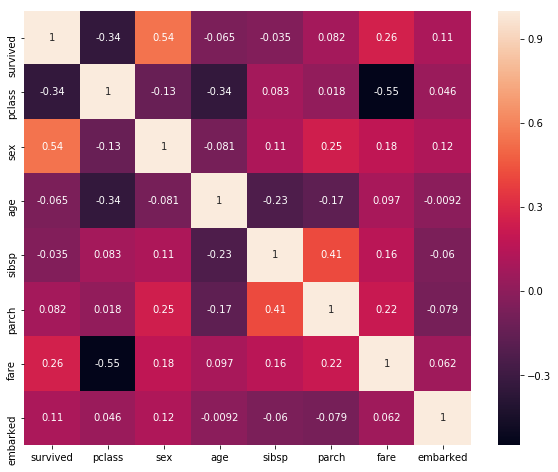

In [203]:
plt.subplots(figsize=(10,8));
sns.heatmap(dftr.corr(), annot=True)

# Посмотрим на распределение признаков

## Сначало посмотрим на количественные

AGE, Fare

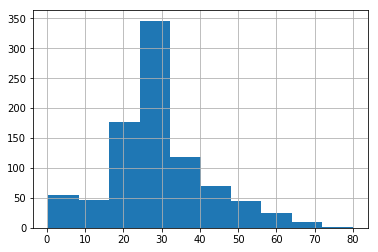

In [204]:
dftr['age'].hist()

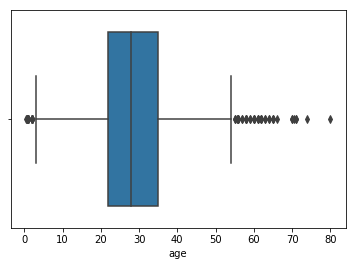

In [205]:
sns.boxplot(dftr.age)

Перейдем к цене за билет

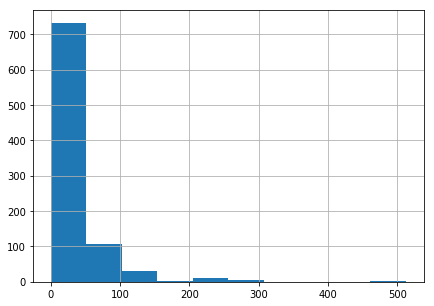

In [206]:
dftr.fare.hist(figsize=(7,5));

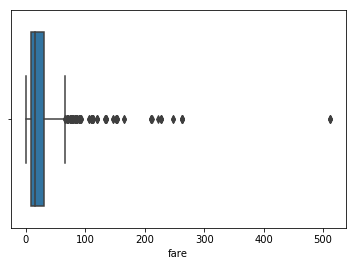

In [207]:
sns.boxplot(dftr['fare'])

## В выборке присутствуют выбросы 

### Отбросим выбросы используя квантиль

In [208]:
q=dftr.fare.quantile(.9)

In [209]:
q

77.9583

In [210]:
dftr1=dftr

In [211]:
dftr123=dftr[dftr['fare']<q]

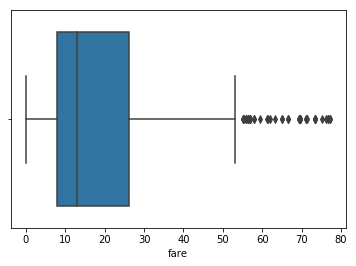

In [212]:
sns.boxplot(dftr123['fare'])

Также можно использовать std

**ВОТ ТАК ВОТ БОРЕМСЯ С ВЫБРОСАМИ**

## Теперь перейдем к категориальным (бинарным признакам)

К ним относятся:

sex, pclass, survived, parch, sibsp,embarked

In [213]:
dftr['sex'].value_counts()

0    577
1    314
Name: sex, dtype: int64

In [214]:
dftr.groupby(['sex']).mean()

,survived,pclass,age,sibsp,parch,fare,embarked
sex,,,,,,,
0,0.188908,2.389948,30.140676,0.429809,0.235702,25.523893,1.306759
1,0.742038,2.159236,27.929936,0.694268,0.649682,44.479818,1.461783


In [215]:
dftr['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

549 - утонуло, 342 - выжило

In [216]:
dftr['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

### Точно также можно посмотреть распределение категориальных переменных на графиках используя countplot

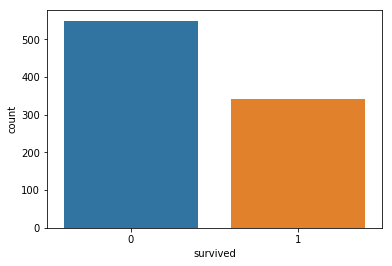

In [217]:
sns.countplot(dftr['survived']);

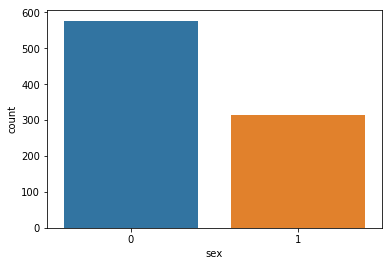

In [218]:
sns.countplot(dftr['sex']);

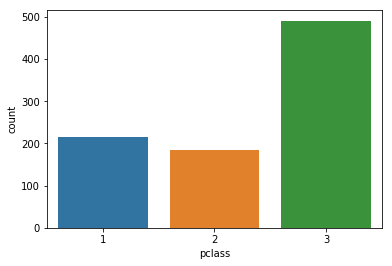

In [219]:
sns.countplot(dftr.pclass)

# А теперь посмотрим взаимодействия между признаками

## Количественный с количественными

ПОСТРОИМ СНАЧАЛА ДВЕ ГИСТОГРАММЫ, по одном для каждого признака на одном графике рядом

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52dd7a3f28>,
      dtype=object)

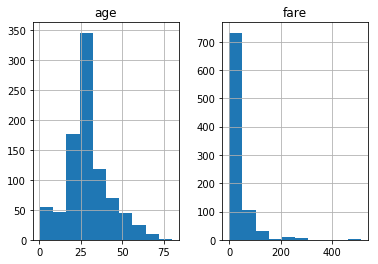

In [220]:
dftr[['fare','age']].hist()

## Взаимодействие двух количественных признаков строится функцией scatterplot

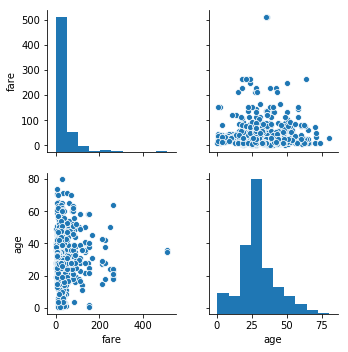

In [221]:
sns.pairplot(dftr[['fare','age']])

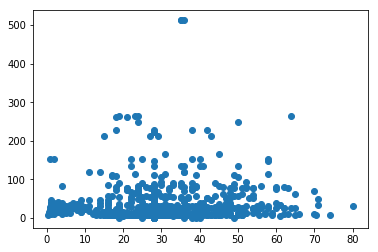

In [222]:
plt.scatter(dftr.age, dftr.fare)

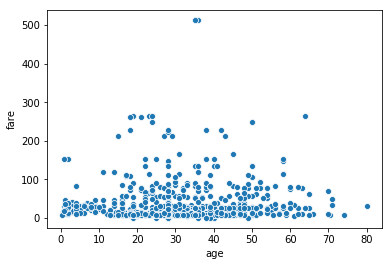

In [223]:
sns.scatterplot(dftr.age, dftr.fare)

## Теперь посмотрим зависимость количественного признака с бинарным

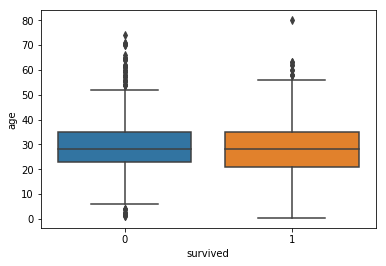

In [224]:
sns.boxplot(dftr.survived, dftr.age);

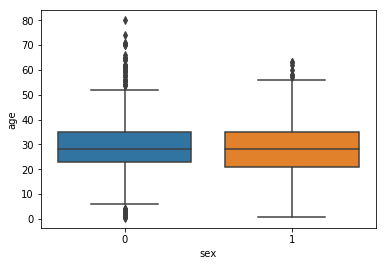

In [225]:
sns.boxplot(dftr.sex, dftr.age);

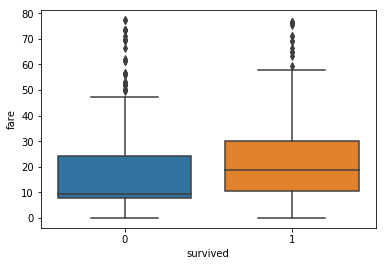

In [226]:
sns.boxplot(dftr123.survived, dftr123.fare); #dftr123 - без выбросов

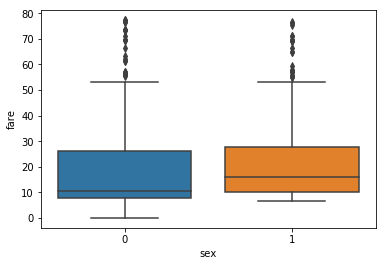

In [227]:
sns.boxplot(dftr.sex, dftr123.fare);

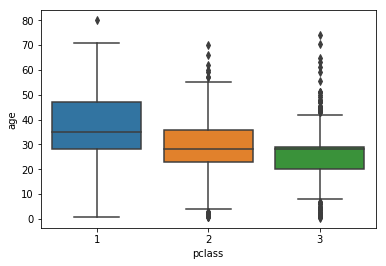

In [228]:
sns.boxplot(dftr.pclass, dftr.age);

Посмотрим средний возраст мужчин и женщин

In [229]:
dftr.groupby('sex')['age'].median() # медиана лучше для возраста

sex
0    28.0
1    28.0
Name: age, dtype: float64

Посмотрим средний возраст выживших

In [230]:
dftr.groupby('survived')['age'].mean()

survived
0    30.028233
1    28.291433
Name: age, dtype: float64

А теперь посмотрим средний возраст выживших мужчин и женщин

In [231]:
dftr.groupby(['survived', 'sex'])['age'].median()

survived  sex
0         0      28.0
          1      28.0
1         0      28.0
          1      28.0
Name: age, dtype: float64

## Теперь перейдем к взаимодействию категориального с категориальным

Для этого мы сначало можем воспользоваться кросс-таблицей

Посмотрим сколько выжило женщин и мужчин

In [232]:
pd.crosstab(dftr.survived, dftr.sex)

sex,0,1
survived,,
0,468,81
1,109,233


Посмотрим сколько мужчин и женщин в разных каютных классах

In [233]:
pd.crosstab(dftr.sex, dftr.pclass)

pclass,1,2,3
sex,,,
0,122,108,347
1,94,76,144


### Перейдем к визуализации взаимодействия категориальных признаков

Посмотрим на количество выживших мужчин и женщин

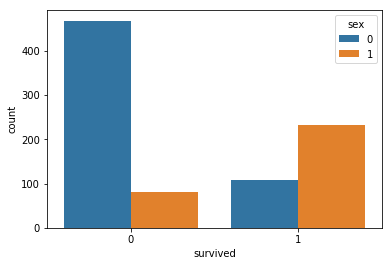

In [234]:
sns.countplot(dftr.survived, hue=dftr.sex);

Делаем вывод что женщин выжило гораздо больше чем мужчин

**Посмотрим сколько женщин и мужчин находится в разных каютных классах**

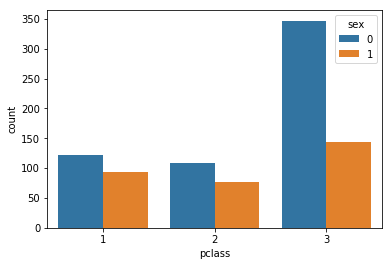

In [235]:
sns.countplot(dftr.pclass, hue = dftr.sex);

# Перейдем к построению модели и классификации

In [236]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [237]:
from sklearn.metrics import accuracy_score, precision_score

In [238]:
from sklearn.ensemble import RandomForestClassifier

In [239]:
from sklearn.tree import DecisionTreeClassifier

In [240]:
from sklearn.neighbors import KNeighborsClassifier

**Сначало мы должны отделить вектор ответов - т.е. столбец $'survived'$ и сделать из него вектора y**

In [241]:
y=dftr['survived']

In [242]:
y.shape, dftr.shape

((891,), (891, 8))

**Теперь удалим survived из DATAFRAME**

In [243]:
dftr.drop('survived', axis=1, inplace=True)

In [244]:
dftr.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

In [245]:
x=dftr

In [246]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=17)

In [247]:
#train_test_split?

In [248]:
tree_first=DecisionTreeClassifier(random_state=17)

In [249]:
list?

In [250]:
tree_params={'max_depth' : np.arange(1,10,1), 'max_features' : list([0.5,0.7,1])}

In [251]:
cross_val_score(tree_first,x_train,y_train, cv=5)

array([0.76190476, 0.8       , 0.80645161, 0.7983871 , 0.78225806])

In [252]:
np.mean(cross_val_score(tree_first,x_train,y_train, cv=5))

0.789800307219662

In [253]:
tree_grid=GridSearchCV?

In [ ]:
tree_grid=GridSearchCV

In [254]:
tree_grid=GridSearchCV

In [255]:
tree_grid=GridSearchCV

In [256]:
tree_grid=GridSearchCV

In [257]:
tree_grid=GridSearchCV(tree_first, tree_params, cv=5, n_jobs=-1)

In [258]:
#Передадим наши параметры модели

In [259]:
%%time
tree_grid.fit(x_train,y_train)

CPU times: user 120 ms, sys: 31.5 ms, total: 151 ms
Wall time: 1.5 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_features': [0.5, 0.7, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [260]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 3, 'max_features': 0.7}, 0.8346709470304976)

In [261]:
tree_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=0.7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [262]:
tree_pred=tree_grid.best_estimator_.predict(x_test)

In [263]:
accuracy_score(y_test, tree_pred)

0.7574626865671642

# Теперь применим алгоритм k-nearst neighbours

In [264]:
from sklearn.neighbors import KNeighborsClassifier

In [265]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [266]:
from sklearn.metrics import accuracy_score

In [267]:
from sklearn.model_selection import train_test_split

In [268]:
knn_clas=KNeighborsClassifier?

In [ ]:
knn_clas=KNeighborsClassifier

In [269]:
knn_clas=KNeighborsClassifier

In [270]:
knn_clas=KNeighborsClassifier()

In [271]:
cross_val_score(knn_clas,x_train,y_train)

array([0.67307692, 0.69230769, 0.71014493])

In [272]:
np.mean(cross_val_score(knn_clas,x_train,y_train))

0.6918431809736157

### Попробуем подобрать параметры чтобы увеличить точность

In [273]:
knn_params={'n_neighbors' : np.arange(1,10,1)}

In [274]:
GridSearchCV?

In [275]:
knn_grid=GridSearchCV(knn_clas, knn_params,cv=5, n_jobs=-1)

#n_jobs - задействует все процессоры для подсчета

**Далее обучаем нашу модель**

In [276]:
%%time
knn_grid.fit(x_train,y_train)

CPU times: user 32.4 ms, sys: 188 µs, total: 32.6 ms
Wall time: 256 ms


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [277]:
knn_grid.best_score_, knn_grid.best_params_

(0.709470304975923, {'n_neighbors': 2})

In [278]:
knn_grid.best_estimator_.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

In [279]:
knn_pred=knn_grid.best_estimator_.predict(x_test)

In [280]:
accuracy_score(y_test,knn_pred)

0.6380597014925373

# Сформируем файл посылки на KAGGLE

In [281]:
dftr.index?

In [282]:
test=pd.read_csv('titanic_test.csv',index_col='PassengerId')

In [283]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [284]:
test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [285]:
emb_dic={'S' : 1, 'C' : 2, 'Q' :3}

In [286]:
test['Embarked']=test['Embarked'].map(emb_dic)

In [287]:
test.drop(['Cabin'], axis=1,inplace=True)

Заменим нулевые значения в возрасте медианой

In [288]:
test['Age'].fillna(test['Age'].median(), inplace=True)

In [289]:
test.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    0
dtype: int64

In [290]:
sex_dic={'female' : 1, 'male' : 0}

test['Sex']=test['Sex'].map(sex_dic)

In [291]:
test.drop(columns='Name', inplace=True)

In [292]:
test.drop(columns='Ticket', inplace=True)

In [293]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,0,34.5,0,0,7.8292,3
893,3,1,47.0,1,0,7.0000,1
894,2,0,62.0,0,0,9.6875,3
895,3,0,27.0,0,0,8.6625,1
896,3,1,22.0,1,1,12.2875,1


In [294]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [295]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [296]:
knn_pred2test=knn_grid.best_estimator_.predict(test)

In [297]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,0,34.5,0,0,7.8292,3
893,3,1,47.0,1,0,7.0000,1
894,2,0,62.0,0,0,9.6875,3
895,3,0,27.0,0,0,8.6625,1
896,3,1,22.0,1,1,12.2875,1


In [298]:
knn_pred[:10], test.index[:10]

(array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 Int64Index([892, 893, 894, 895, 896, 897, 898, 899, 900, 901], dtype='int64', name='PassengerId'))

In [299]:
pd.Series(knn_pred2test,index = test.index, name = 'target').to_csv('titan_pred.csv', 
                                                                    header = True, index_label='PassengerId', )

Тоже самое произведем для ДЕРЕВЬЕВ РЕШЕНИЙ

In [300]:
tree_pr2=tree_grid.best_estimator_.predict(test)

In [303]:
tree_pr2[:10], test.index

(array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0]),
 Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
             ...
             1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
            dtype='int64', name='PassengerId', length=418))

In [304]:
pd.Series(tree_pr2, index=test.index, name='target').to_csv('tree_titanic_pred.csv', header=True, 
                                                            index_label='PassengerId')